<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Step4 : show on map
</font>
</h1>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

housing_extended = pd.read_csv('housing_extended.csv', encoding='gbk')

in this step we just use 1% of how data.The reason for this is to prevent the notebook and output files from becoming heavy.

In [2]:
housing_sample = housing_extended.iloc[:-100:100]
housing_sample.shape

(2850, 20)

with having lng and lat of houses we can plot scatter of houses.
please note that. axes scales must be equal

Text(0.5, 1.0, 'scatter plot')

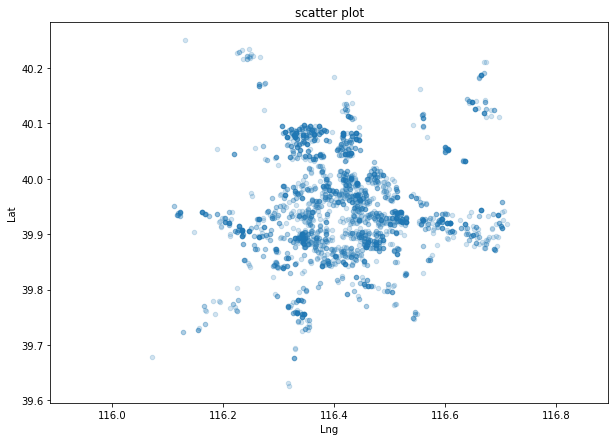

In [3]:
fig1 , ax1 = plt.subplots()
fig1.set_size_inches(10,7)

housing_sample.plot(x = 'Lng' , y ='Lat' ,ax = ax1, kind = 'scatter', alpha = 0.2)
ax1.axis('equal')
ax1.set_title('scatter plot')

as you see most of houses are gathered in one place. That is capital of China.

we want to add more features to our plot.
with changing "c" we can change color of dots
with changing "s" we can change size of dots


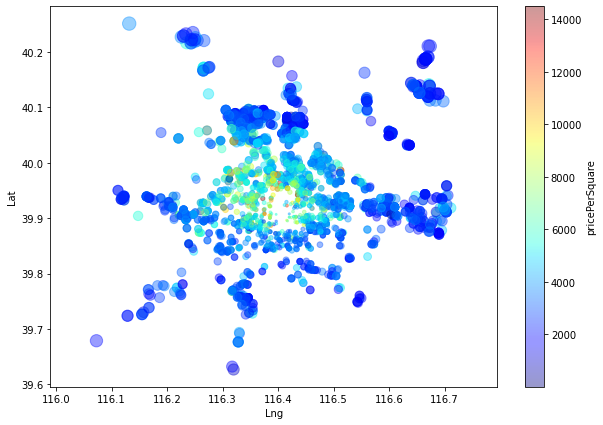

In [30]:
fig2 , ax2 = plt.subplots()
fig2.set_size_inches(10,7)

housing_sample.plot(x = 'Lng' , y ='Lat' ,ax = ax2, kind = 'scatter',alpha = 0.4,
                c = 'pricePerSquare', cmap=plt.get_cmap("jet"),colorbar=True,s=housing_sample["distanceToCapital"]*4)

ax2.axis('equal');

our plot show that the most expensive houses is near to capital

we want to show center of city in plot like below:
<li>
location of text : (116.6,39.65)
</li>

  <li>
location of flash tail (116.4,39.9)
</li>

  <li>
text : "center of beijing"
</li>

  <li>
connectionStyle : connectionStyle
</li>
  <li>arrowStyle : fancy</li>

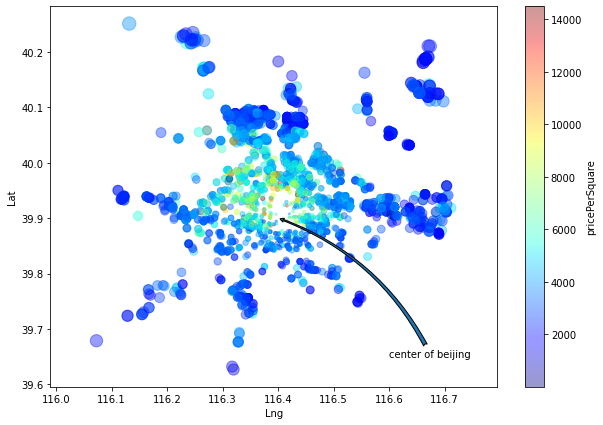

In [31]:
from matplotlib.patches import ConnectionStyle
connectionstyle = ConnectionStyle("Arc3", rad=0.2)

ax2.annotate("center of beijing",xytext=(116.6,39.65) ,xy=(116.4,39.9)  , arrowprops=dict(arrowstyle="fancy",connectionstyle=connectionstyle)  ) # to do
fig2

we can usemap background image for our plot.
we use google map for our image and save it in "map1"

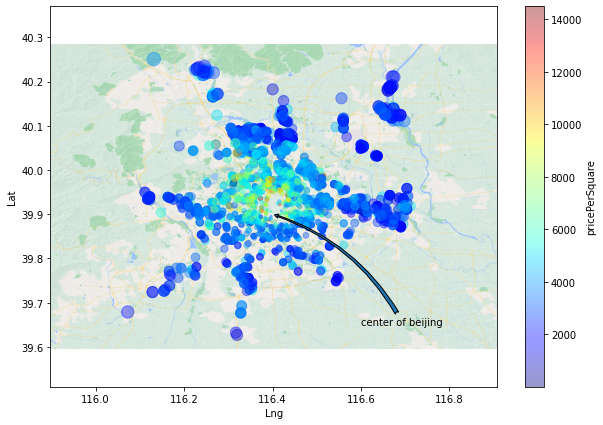

In [32]:
import matplotlib.image as mpimg

beijing_img = mpimg.imread('map1.jpg')
ax2.imshow(beijing_img, extent=[115.89777890444654, 116.90711309555346, 39.5957436, 40.2840444])
fig2

now in another plot we use "district" for color and "square" for size.


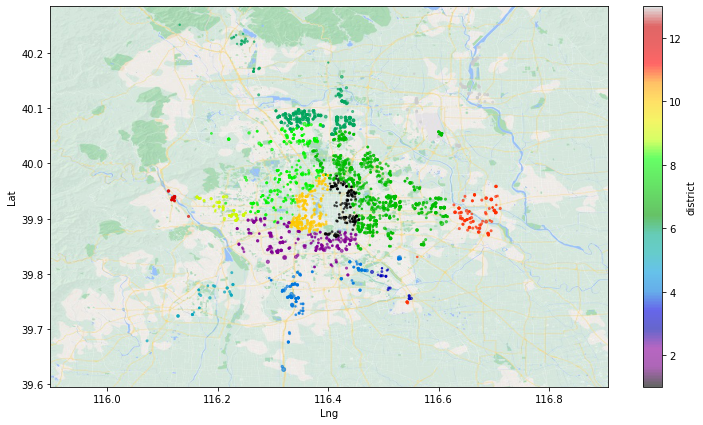

In [33]:
fig3, ax3 = plt.subplots(figsize= (12.5,7))
housing_sample.plot(x = 'Lng' , y ='Lat' ,ax = ax3, kind = 'scatter', alpha = 0.6,c="district" , cmap =plt.get_cmap("nipy_spectral")  ,s=housing_sample['square']/20 )


beijing_img = mpimg.imread('map1.jpg')
ax3.imshow(beijing_img, extent=[115.89777890444654, 116.90711309555346, 39.5957436, 40.2840444]);

now we want to plot again. But only houses that are between 10-30km of center.
and use "map2" image.

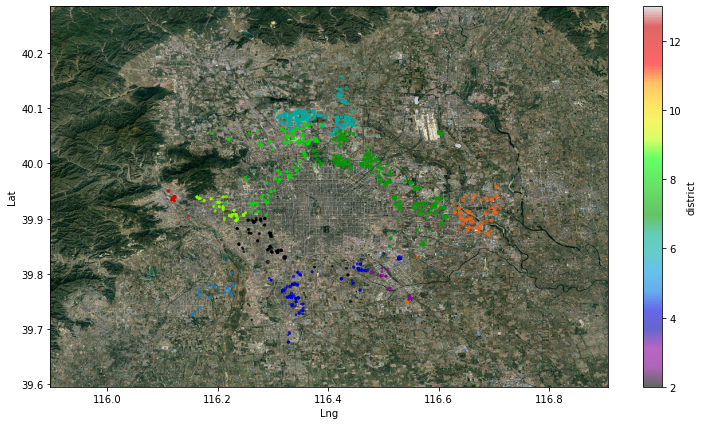

In [36]:
fig4, ax4 = plt.subplots(figsize= (12.5,7))
tmpdf = housing_sample[((housing_sample["distanceToCapital"]>10) & (housing_sample["distanceToCapital"]<30))]
tmpdf.plot(x = 'Lng' , y ='Lat' ,ax = ax4, kind = 'scatter', alpha = 0.6,c="district" , cmap =plt.get_cmap("nipy_spectral")  ,s=tmpdf['square']/20 )

beijing_img = mpimg.imread('map2.jpg')
ax4.imshow(beijing_img, extent=[115.89777890444654, 116.90711309555346, 39.5957436, 40.2840444]);